#Introduction

This project aims to build a predictive model which predicts whethera potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

The dataset is obtained from a large MNC having 9 broad verticals which faces the issue ofidentifying the right people for promotion and prepare them in time.

Dataset : HR Analytics-Employee Promotion Prediction


#Load libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Train data
df_train = pd.read_csv('/content/train_LZdllcl.csv')
df_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [3]:
#Loading Test data
df_test = pd.read_csv('/content/test_2umaH9m.csv')
df_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [4]:
#Loading Sample submission
df_sample = pd.read_csv('/content/sample_submission_M0L0uXE.csv')
df_sample

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


#EDA(Train data)

In [5]:
#Displaying the train data from the top (first n rows)
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
#Displaying the train data from the bottom(last n rows)
df_train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [7]:
#Summary of train data which includes number of rows and columns, names and data types of each column and whether there are any null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
#Shows the number of rows and columns
df_train.shape

(54808, 14)

In [9]:
#Shows the names of each column present in the data
df_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [10]:
#Shows the data types of each column
df_train.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [11]:
#Gives the statistical information of the train data
df_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [12]:
#Identifying numerical and categorical features
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Numeric features are: ",numeric_features)
print(f"Categorical features are: ",categorical_features)

Numeric features are:  ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']
Categorical features are:  ['department', 'region', 'education', 'gender', 'recruitment_channel']


In [13]:
#No. of occurances of each unique value
df_train['department'].value_counts()

,count
department,
Sales & Marketing,16840
Operations,11348
Technology,7138
Procurement,7138
Analytics,5352
Finance,2536
HR,2418
Legal,1039
R&D,999


In [14]:
#No. of occurances of each unique value
df_train['region'].value_counts()

,count
region,
region_2,12343
region_22,6428
region_7,4843
region_15,2808
region_13,2648
region_26,2260
region_31,1935
region_4,1703
region_27,1659


In [15]:
#No. of occurances of each unique value
df_train['education'].value_counts()

,count
education,
Bachelor's,36669
Master's & above,14925
Below Secondary,805


In [16]:
#No. of occurances of each unique value
df_train['gender'].value_counts()

,count
gender,
m,38496
f,16312


In [17]:
#No. of occurances of each unique value
df_train['recruitment_channel'].value_counts()

,count
recruitment_channel,
other,30446
sourcing,23220
referred,1142


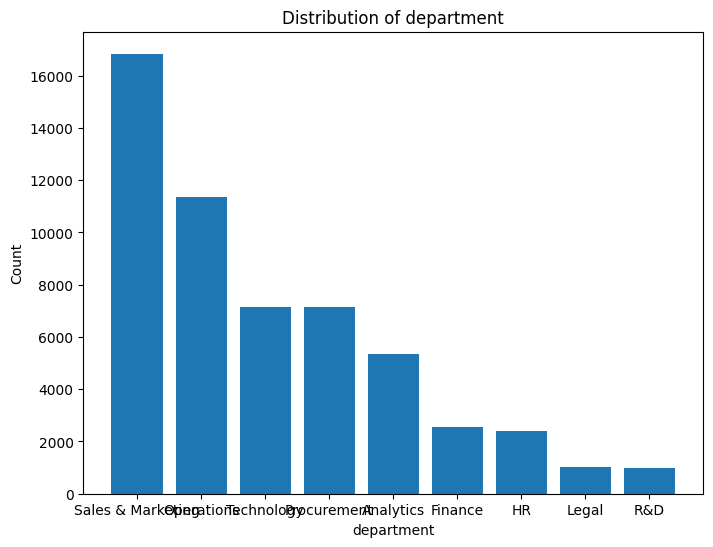

In [18]:
#Bar plots of categorical features
department= df_train['department'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(department.index, department.values)
plt.xlabel('department')
plt.ylabel('Count')
plt.title('Distribution of department')
plt.show()

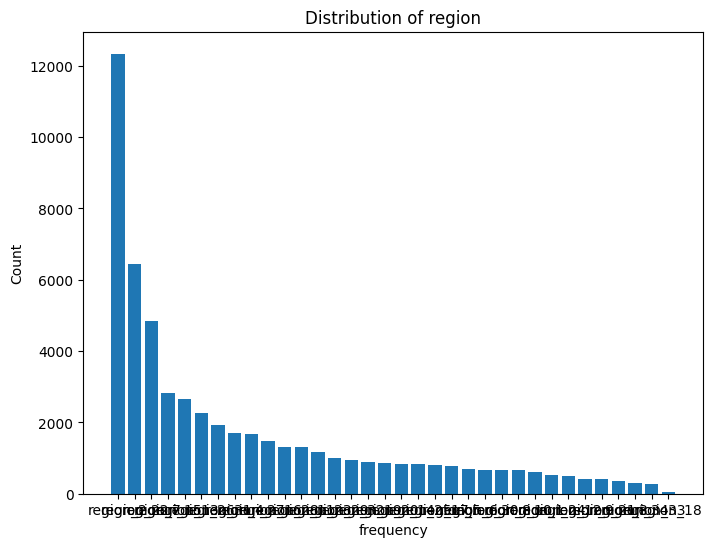

In [19]:
#Bar plots of categorical features
region = df_train['region'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(region.index, region.values)
plt.xlabel('frequency')
plt.ylabel('Count')
plt.title('Distribution of region')
plt.show()

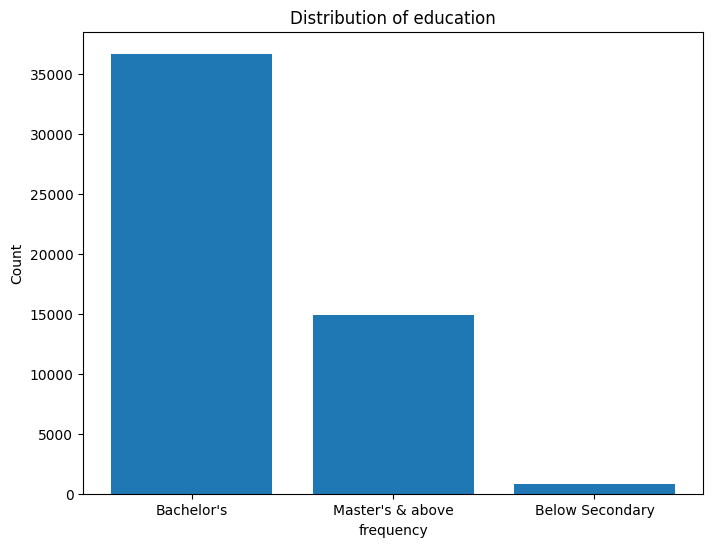

In [20]:
#Bar plots of categorical features
education = df_train['education'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(education.index, education.values)
plt.xlabel('frequency')
plt.ylabel('Count')
plt.title('Distribution of education')
plt.show()

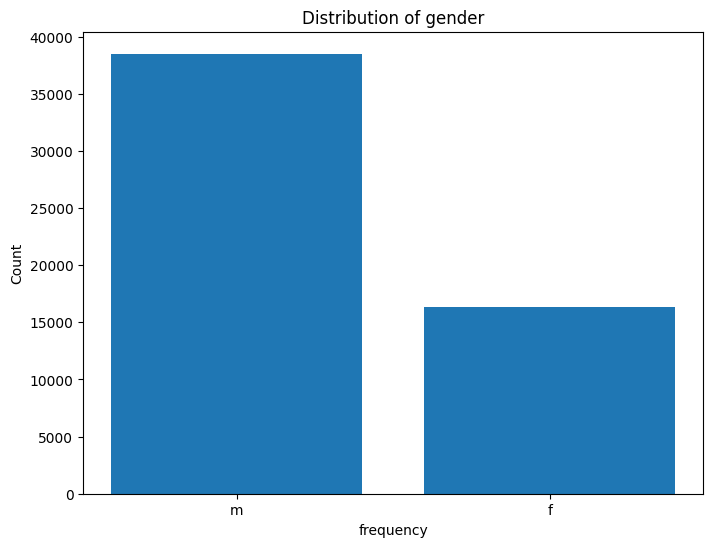

In [21]:
#Bar plots of categorical features
gender= df_train['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender.index, gender.values)
plt.xlabel('frequency')
plt.ylabel('Count')
plt.title('Distribution of gender')
plt.show()

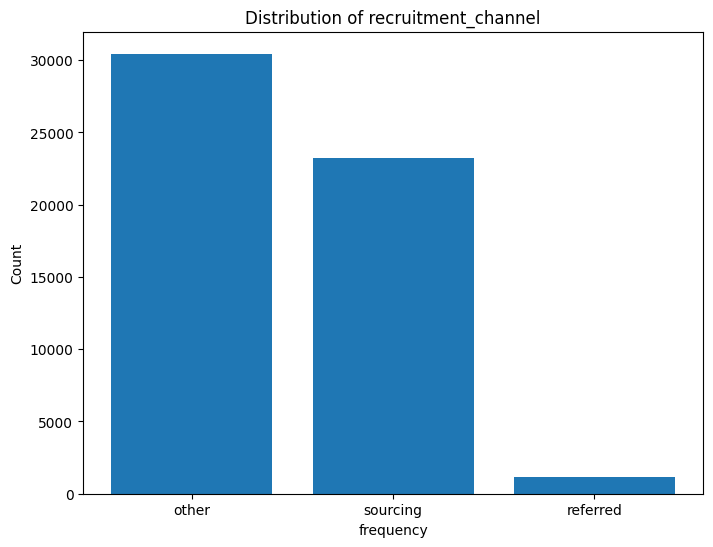

In [22]:
#Bar plots of categorical features
recruitment_channel= df_train['recruitment_channel'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(recruitment_channel.index, recruitment_channel.values)
plt.xlabel('frequency')
plt.ylabel('Count')
plt.title('Distribution of recruitment_channel')
plt.show()

<Axes: >

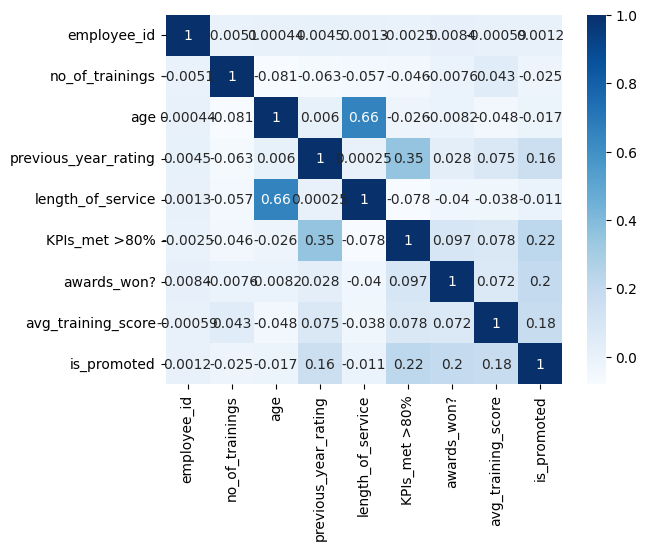

In [23]:
#Correlation matrix to show the relatonship between the numeric features
numeric_df = df_train.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

array([[<Axes: title={'center': 'employee_id'}>,
        <Axes: title={'center': 'no_of_trainings'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'previous_year_rating'}>,
        <Axes: title={'center': 'length_of_service'}>,
        <Axes: title={'center': 'KPIs_met >80%'}>],
       [<Axes: title={'center': 'awards_won?'}>,
        <Axes: title={'center': 'avg_training_score'}>,
        <Axes: title={'center': 'is_promoted'}>]], dtype=object)

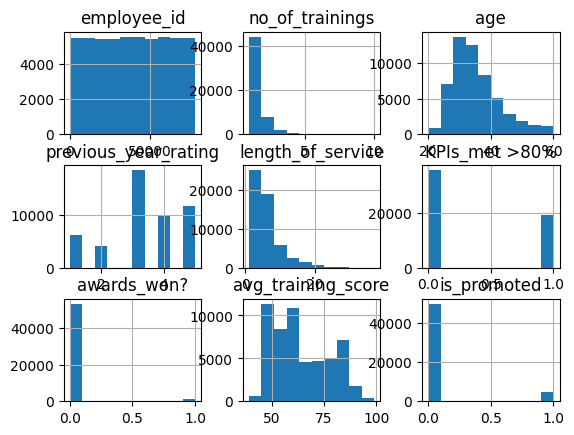

In [24]:
#Distribution of numerical features
df_train.hist()

#EDA(Test data)

In [25]:
#Displaying the test data from the top (first n rows)
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [26]:
#Displaying the test data from the bottom(last n rows)
df_test.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [27]:
#Summary of test data which includes number of rows and columns, names and data types of each column and whether there are any null values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [28]:
#Shows the number of rows and columns
df_test.shape

(23490, 13)

In [29]:
#Shows the names of each column present in the data
df_test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [30]:
#Shows the data types of each column
df_test.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [31]:
#Gives the statistical information of the train data
df_test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [32]:
#Identifying numerical and categorical features
numeric_features = df_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_test.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Numeric features are: ",numeric_features)
print(f"Categorical features are: ",categorical_features)

Numeric features are:  ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']
Categorical features are:  ['department', 'region', 'education', 'gender', 'recruitment_channel']


In [33]:
#No. of occurances of each unique value
df_test['department'].value_counts()

,count
department,
Sales & Marketing,7315
Operations,4764
Procurement,3020
Technology,3011
Analytics,2319
Finance,1091
HR,1085
Legal,445
R&D,440


In [34]:
#No. of occurances of each unique value
df_test['region'].value_counts()

,count
region,
region_2,5299
region_22,2739
region_7,1982
region_13,1167
region_15,1130
region_26,1011
region_31,844
region_4,775
region_27,710


In [35]:
#No. of occurances of each unique value
df_test['education'].value_counts()

,count
education,
Bachelor's,15578
Master's & above,6504
Below Secondary,374


In [36]:
#No. of occurances of each unique value
df_test['gender'].value_counts()

,count
gender,
m,16596
f,6894


In [37]:
#No. of occurances of each unique value
df_test['recruitment_channel'].value_counts()

,count
recruitment_channel,
other,13078
sourcing,9961
referred,451


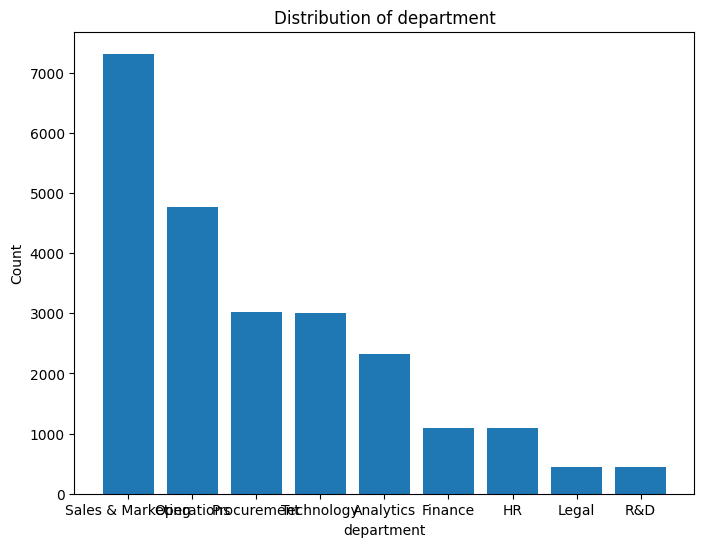

In [38]:
#Bar plots of categorical features
department= df_test['department'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(department.index, department.values)
plt.xlabel('department')
plt.ylabel('Count')
plt.title('Distribution of department')
plt.show()

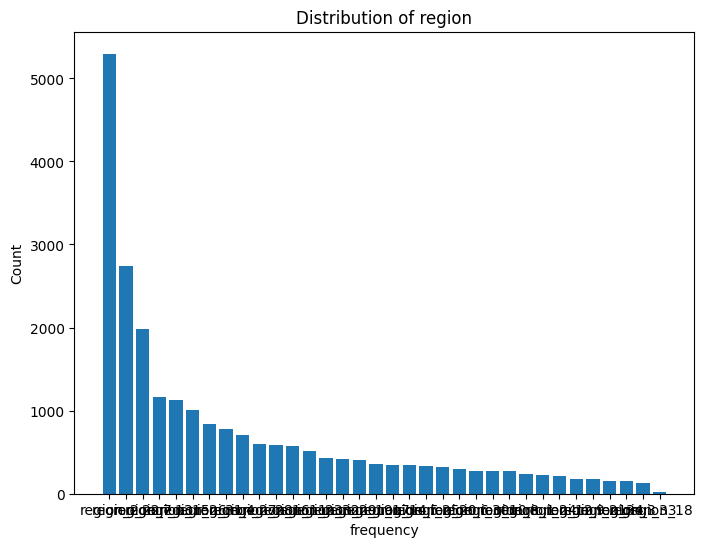

In [39]:
#Bar plots of categorical features
region = df_test['region'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(region.index, region.values)
plt.xlabel('frequency')
plt.ylabel('Count')
plt.title('Distribution of region')
plt.show()

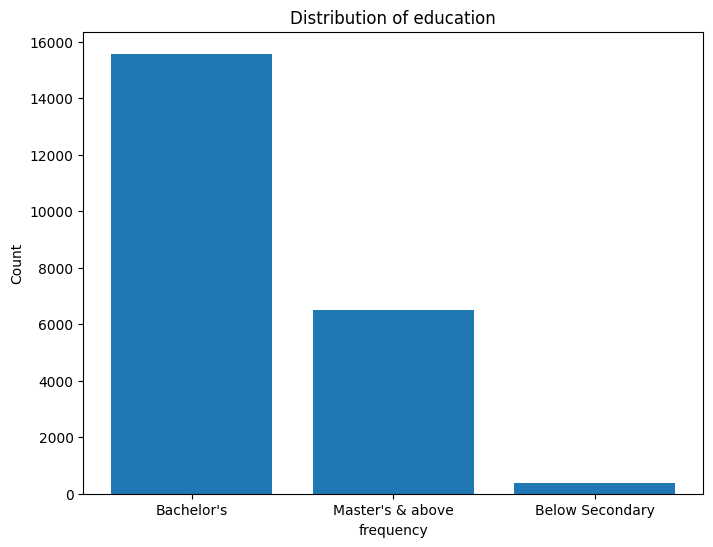

In [40]:
#Bar plots of categorical features
education = df_test['education'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(education.index, education.values)
plt.xlabel('frequency')
plt.ylabel('Count')
plt.title('Distribution of education')
plt.show()

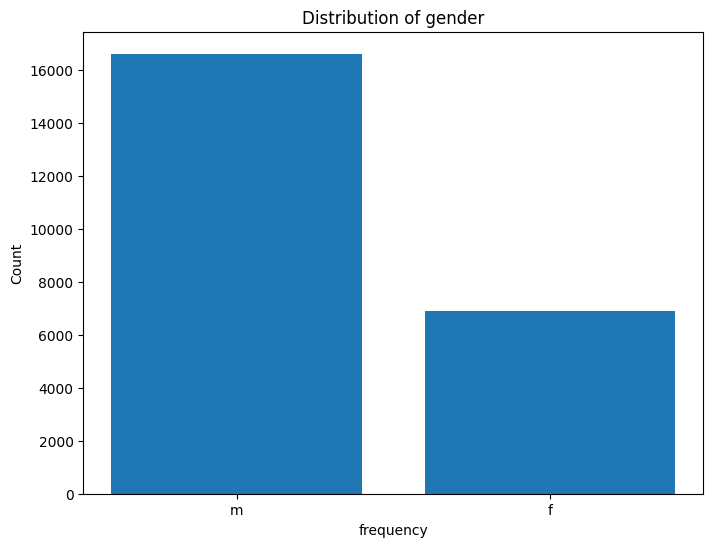

In [41]:
#Bar plots of categorical features
gender= df_test['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender.index, gender.values)
plt.xlabel('frequency')
plt.ylabel('Count')
plt.title('Distribution of gender')
plt.show()

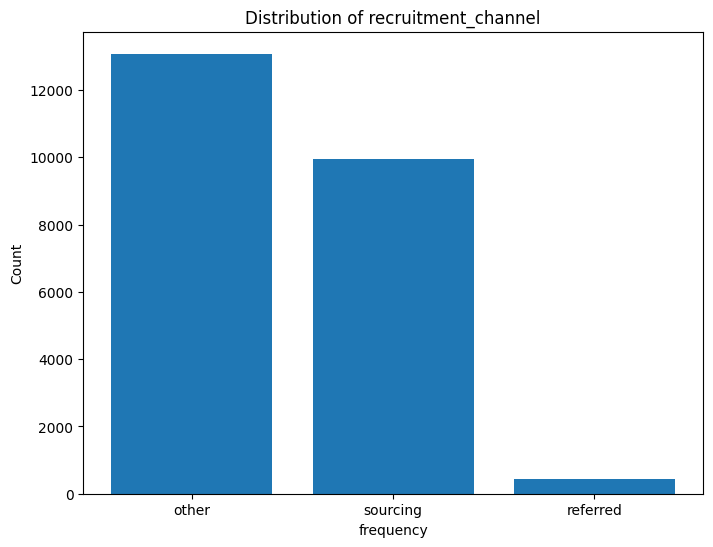

In [42]:
#Bar plots of categorical features
recruitment_channel= df_test['recruitment_channel'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(recruitment_channel.index, recruitment_channel.values)
plt.xlabel('frequency')
plt.ylabel('Count')
plt.title('Distribution of recruitment_channel')
plt.show()

<Axes: >

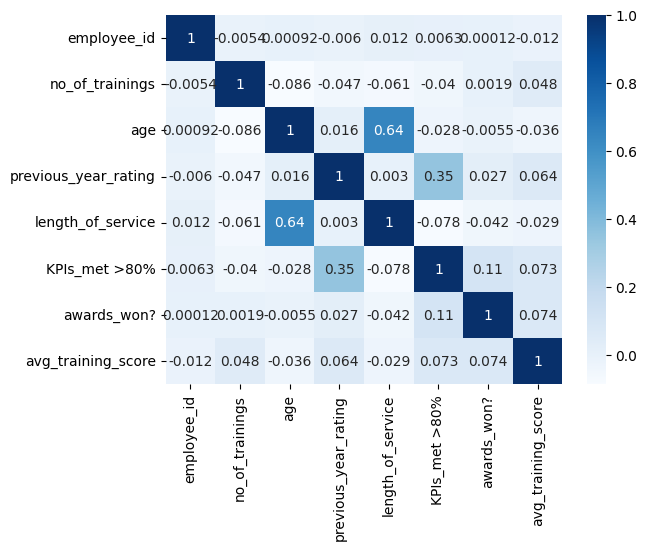

In [43]:
#Correlation matrix to show the relatonship between the numeric features
numeric_df = df_test.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

array([[<Axes: title={'center': 'employee_id'}>,
        <Axes: title={'center': 'no_of_trainings'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'previous_year_rating'}>,
        <Axes: title={'center': 'length_of_service'}>,
        <Axes: title={'center': 'KPIs_met >80%'}>],
       [<Axes: title={'center': 'awards_won?'}>,
        <Axes: title={'center': 'avg_training_score'}>, <Axes: >]],
      dtype=object)

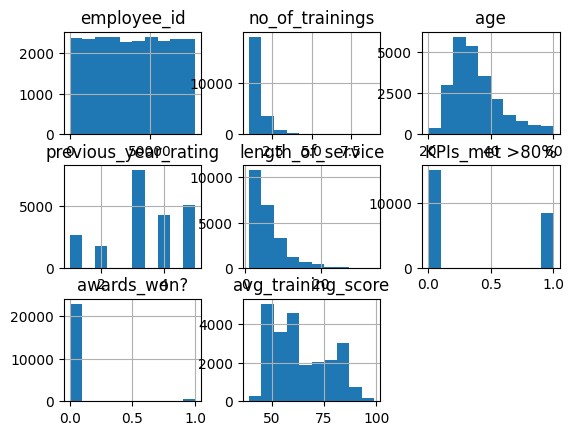

In [44]:
#Distribution of numerical features
df_test.hist()

#Preprocessing

##Checking for null values and eliminating them

In [45]:
df_train.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [46]:
df_train['education'] = df_train['education'].fillna(df_train['education'].mode()[0])

In [47]:
df_train['previous_year_rating'] = df_train['previous_year_rating'].fillna(df_train['previous_year_rating'].mean())

In [48]:
df_train.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [49]:
df_test.isnull().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [50]:
df_test['education'] = df_test['education'].fillna(df_test['education'].mode()[0])

In [51]:
df_test['previous_year_rating'] = df_test['previous_year_rating'].fillna(df_test['previous_year_rating'].mean())

In [52]:
df_test.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


##Checking for duplicates and handling them

In [53]:
df_train.duplicated().sum()

np.int64(0)

In [54]:
df_test.duplicated().sum()

np.int64(0)

##Checking for outliers and handling them

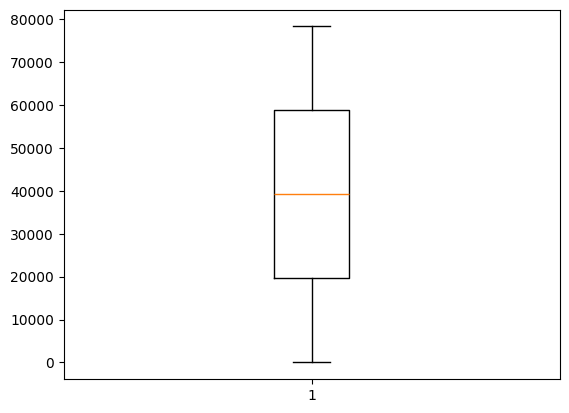

In [55]:
plt.boxplot(df_train['employee_id'])
plt.show()

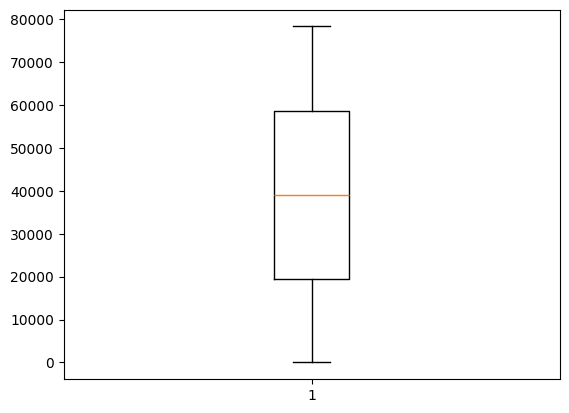

In [56]:
plt.boxplot(df_test['employee_id'])
plt.show()

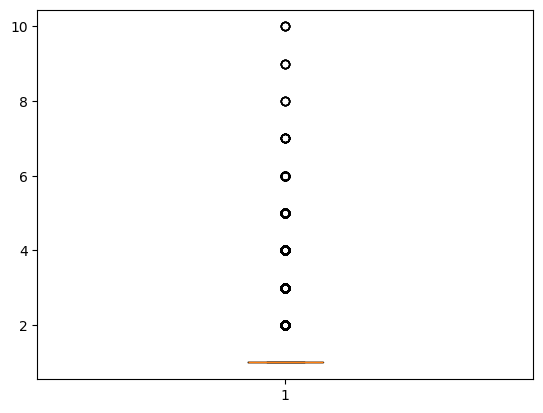

In [57]:
plt.boxplot(df_train['no_of_trainings'])
plt.show()

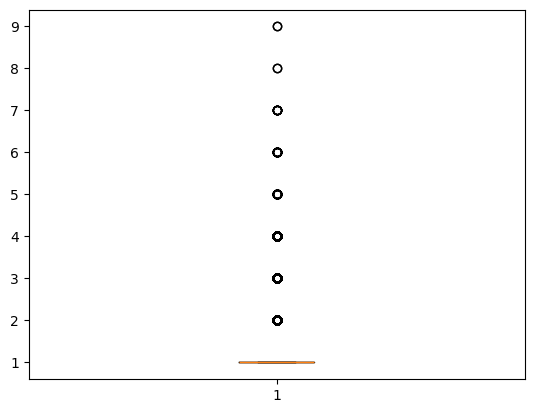

In [58]:
plt.boxplot(df_test['no_of_trainings'])
plt.show()

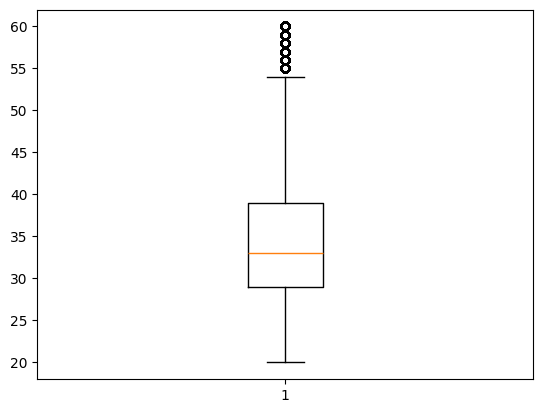

In [59]:
plt.boxplot(df_train['age'])
plt.show()

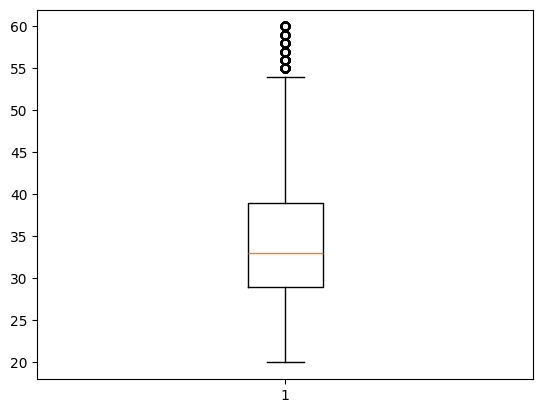

In [60]:
plt.boxplot(df_test['age'])
plt.show()

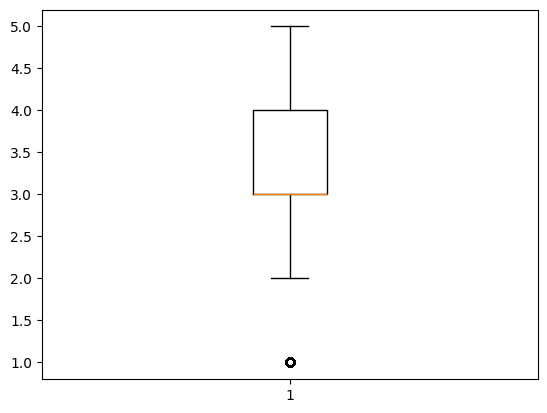

In [61]:
plt.boxplot(df_train['previous_year_rating'])
plt.show()

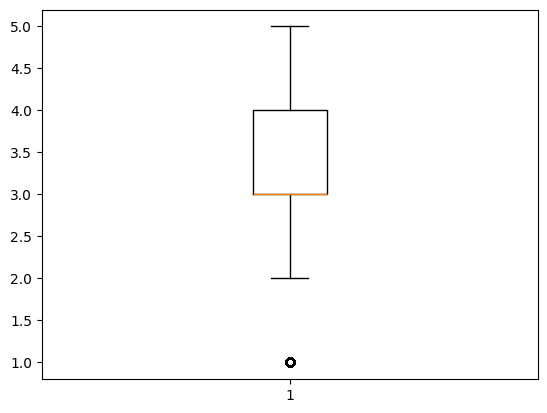

In [62]:
plt.boxplot(df_test['previous_year_rating'])
plt.show()

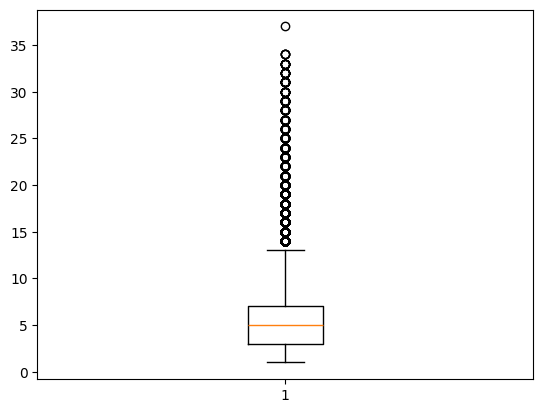

In [63]:
plt.boxplot(df_train['length_of_service'])
plt.show()

In [64]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_train[['length_of_service']] = scaler.fit_transform(df_train[['length_of_service']])



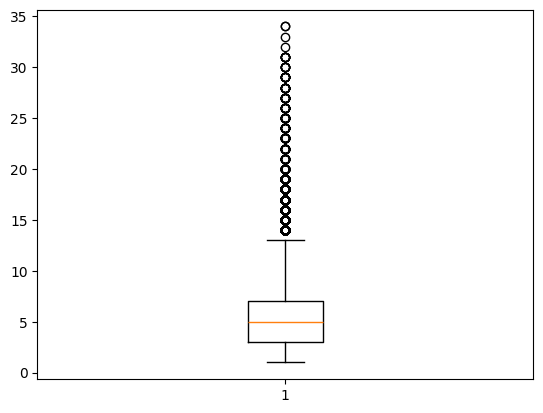

In [65]:
plt.boxplot(df_test['length_of_service'])
plt.show()

In [66]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_test[['length_of_service']] = scaler.fit_transform(df_test[['length_of_service']])



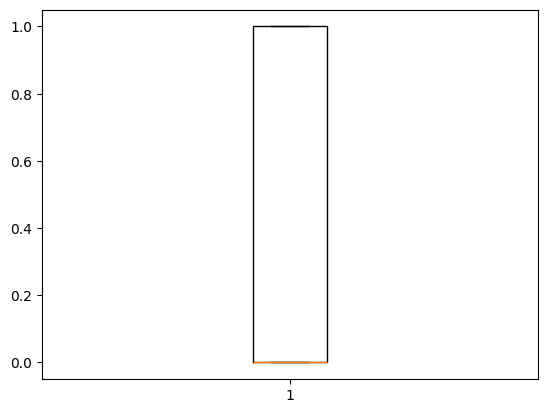

In [67]:
plt.boxplot(df_train['KPIs_met >80%'])
plt.show()

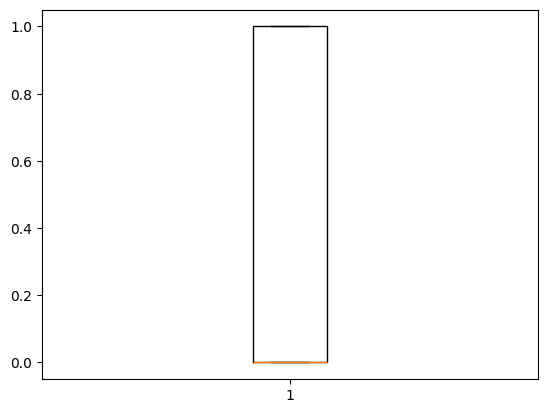

In [68]:
plt.boxplot(df_test['KPIs_met >80%'])
plt.show()

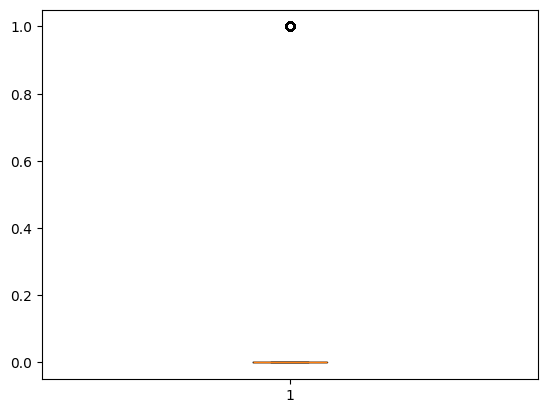

In [69]:
plt.boxplot(df_train['awards_won?'])
plt.show()

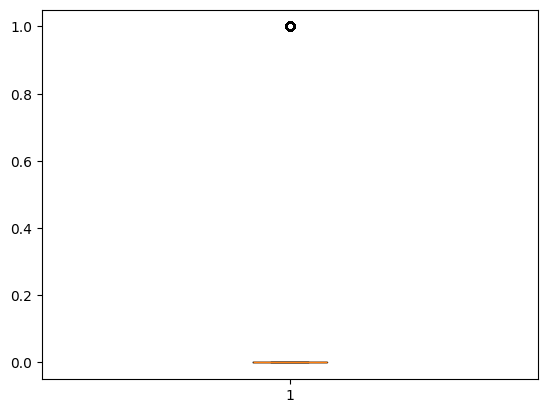

In [70]:
plt.boxplot(df_test['awards_won?'])
plt.show()

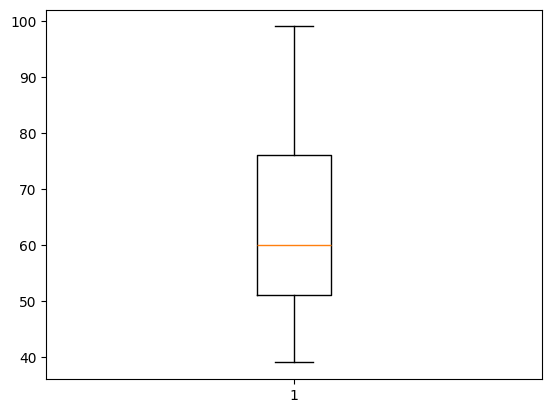

In [71]:
plt.boxplot(df_train['avg_training_score'])
plt.show()

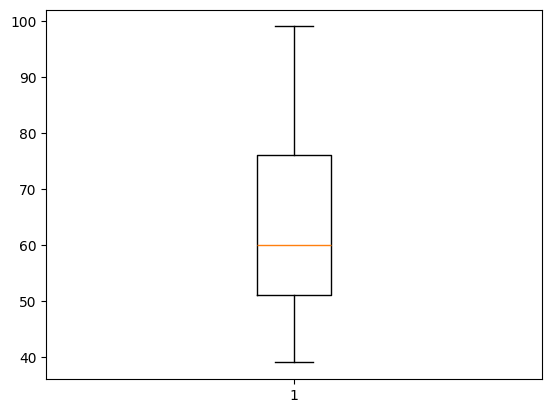

In [72]:
plt.boxplot(df_test['avg_training_score'])
plt.show()

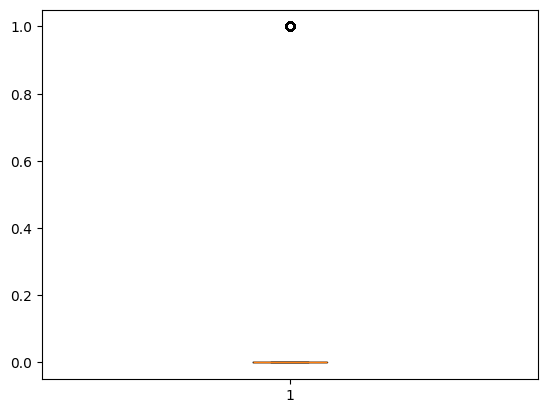

In [73]:
plt.boxplot(df_train['is_promoted'])
plt.show()

##Label encoding

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['department'] = le.fit_transform(df_train['department'])
df_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,region_7,Master's & above,f,sourcing,1,35,5.0,0.75,1,0,49,0
1,65141,4,region_22,Bachelor's,m,other,1,30,5.0,-0.25,0,0,60,0
2,7513,7,region_19,Bachelor's,m,sourcing,1,34,3.0,0.50,0,0,50,0
3,2542,7,region_23,Bachelor's,m,other,2,39,1.0,1.25,0,0,50,0
4,48945,8,region_26,Bachelor's,m,other,1,45,3.0,-0.75,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,region_14,Bachelor's,m,sourcing,1,48,3.0,3.00,0,0,78,0
54804,74592,4,region_27,Master's & above,f,other,1,37,2.0,0.25,0,0,56,0
54805,13918,0,region_1,Bachelor's,m,other,1,27,5.0,-0.50,1,0,79,0
54806,13614,7,region_9,Bachelor's,m,sourcing,1,29,1.0,-0.75,0,0,45,0


In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['department'] = le.fit_transform(df_test['department'])
df_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,region_26,Bachelor's,m,sourcing,1,24,3.339146,-1.00,1,0,77
1,74430,2,region_4,Bachelor's,f,other,1,31,3.000000,0.00,0,0,51
2,72255,7,region_13,Bachelor's,m,other,1,31,1.000000,-0.25,0,0,47
3,38562,5,region_2,Bachelor's,f,other,3,31,2.000000,1.00,0,0,65
4,64486,1,region_29,Bachelor's,m,sourcing,1,30,4.000000,0.50,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,region_2,Below Secondary,m,sourcing,1,24,3.000000,-1.00,0,0,61
23486,25600,8,region_25,Bachelor's,m,sourcing,1,31,3.000000,0.50,0,0,74
23487,45409,2,region_16,Bachelor's,f,sourcing,1,26,4.000000,-0.25,0,0,50
23488,1186,5,region_31,Bachelor's,m,sourcing,3,27,3.339146,-1.00,0,0,70


In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['region'] = le.fit_transform(df_train['region'])
df_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,Master's & above,f,sourcing,1,35,5.0,0.75,1,0,49,0
1,65141,4,14,Bachelor's,m,other,1,30,5.0,-0.25,0,0,60,0
2,7513,7,10,Bachelor's,m,sourcing,1,34,3.0,0.50,0,0,50,0
3,2542,7,15,Bachelor's,m,other,2,39,1.0,1.25,0,0,50,0
4,48945,8,18,Bachelor's,m,other,1,45,3.0,-0.75,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,Bachelor's,m,sourcing,1,48,3.0,3.00,0,0,78,0
54804,74592,4,19,Master's & above,f,other,1,37,2.0,0.25,0,0,56,0
54805,13918,0,0,Bachelor's,m,other,1,27,5.0,-0.50,1,0,79,0
54806,13614,7,33,Bachelor's,m,sourcing,1,29,1.0,-0.75,0,0,45,0


In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['region'] = le.fit_transform(df_test['region'])
df_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,Bachelor's,m,sourcing,1,24,3.339146,-1.00,1,0,77
1,74430,2,28,Bachelor's,f,other,1,31,3.000000,0.00,0,0,51
2,72255,7,4,Bachelor's,m,other,1,31,1.000000,-0.25,0,0,47
3,38562,5,11,Bachelor's,f,other,3,31,2.000000,1.00,0,0,65
4,64486,1,21,Bachelor's,m,sourcing,1,30,4.000000,0.50,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,11,Below Secondary,m,sourcing,1,24,3.000000,-1.00,0,0,61
23486,25600,8,17,Bachelor's,m,sourcing,1,31,3.000000,0.50,0,0,74
23487,45409,2,7,Bachelor's,f,sourcing,1,26,4.000000,-0.25,0,0,50
23488,1186,5,24,Bachelor's,m,sourcing,3,27,3.339146,-1.00,0,0,70


In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['education'] = le.fit_transform(df_train['education'])
df_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,f,sourcing,1,35,5.0,0.75,1,0,49,0
1,65141,4,14,0,m,other,1,30,5.0,-0.25,0,0,60,0
2,7513,7,10,0,m,sourcing,1,34,3.0,0.50,0,0,50,0
3,2542,7,15,0,m,other,2,39,1.0,1.25,0,0,50,0
4,48945,8,18,0,m,other,1,45,3.0,-0.75,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,m,sourcing,1,48,3.0,3.00,0,0,78,0
54804,74592,4,19,2,f,other,1,37,2.0,0.25,0,0,56,0
54805,13918,0,0,0,m,other,1,27,5.0,-0.50,1,0,79,0
54806,13614,7,33,0,m,sourcing,1,29,1.0,-0.75,0,0,45,0


In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['education'] = le.fit_transform(df_test['education'])
df_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,m,sourcing,1,24,3.339146,-1.00,1,0,77
1,74430,2,28,0,f,other,1,31,3.000000,0.00,0,0,51
2,72255,7,4,0,m,other,1,31,1.000000,-0.25,0,0,47
3,38562,5,11,0,f,other,3,31,2.000000,1.00,0,0,65
4,64486,1,21,0,m,sourcing,1,30,4.000000,0.50,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,11,1,m,sourcing,1,24,3.000000,-1.00,0,0,61
23486,25600,8,17,0,m,sourcing,1,31,3.000000,0.50,0,0,74
23487,45409,2,7,0,f,sourcing,1,26,4.000000,-0.25,0,0,50
23488,1186,5,24,0,m,sourcing,3,27,3.339146,-1.00,0,0,70


In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['gender'] = le.fit_transform(df_train['gender'])
df_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,sourcing,1,35,5.0,0.75,1,0,49,0
1,65141,4,14,0,1,other,1,30,5.0,-0.25,0,0,60,0
2,7513,7,10,0,1,sourcing,1,34,3.0,0.50,0,0,50,0
3,2542,7,15,0,1,other,2,39,1.0,1.25,0,0,50,0
4,48945,8,18,0,1,other,1,45,3.0,-0.75,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,sourcing,1,48,3.0,3.00,0,0,78,0
54804,74592,4,19,2,0,other,1,37,2.0,0.25,0,0,56,0
54805,13918,0,0,0,1,other,1,27,5.0,-0.50,1,0,79,0
54806,13614,7,33,0,1,sourcing,1,29,1.0,-0.75,0,0,45,0


In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['gender'] = le.fit_transform(df_test['gender'])
df_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,sourcing,1,24,3.339146,-1.00,1,0,77
1,74430,2,28,0,0,other,1,31,3.000000,0.00,0,0,51
2,72255,7,4,0,1,other,1,31,1.000000,-0.25,0,0,47
3,38562,5,11,0,0,other,3,31,2.000000,1.00,0,0,65
4,64486,1,21,0,1,sourcing,1,30,4.000000,0.50,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,11,1,1,sourcing,1,24,3.000000,-1.00,0,0,61
23486,25600,8,17,0,1,sourcing,1,31,3.000000,0.50,0,0,74
23487,45409,2,7,0,0,sourcing,1,26,4.000000,-0.25,0,0,50
23488,1186,5,24,0,1,sourcing,3,27,3.339146,-1.00,0,0,70


In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['recruitment_channel'] = le.fit_transform(df_train['recruitment_channel'])
df_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,0.75,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,-0.25,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,0.50,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,1.25,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,-0.75,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,48,3.0,3.00,0,0,78,0
54804,74592,4,19,2,0,0,1,37,2.0,0.25,0,0,56,0
54805,13918,0,0,0,1,0,1,27,5.0,-0.50,1,0,79,0
54806,13614,7,33,0,1,2,1,29,1.0,-0.75,0,0,45,0


In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['recruitment_channel'] = le.fit_transform(df_test['recruitment_channel'])
df_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,3.339146,-1.00,1,0,77
1,74430,2,28,0,0,0,1,31,3.000000,0.00,0,0,51
2,72255,7,4,0,1,0,1,31,1.000000,-0.25,0,0,47
3,38562,5,11,0,0,0,3,31,2.000000,1.00,0,0,65
4,64486,1,21,0,1,2,1,30,4.000000,0.50,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,11,1,1,2,1,24,3.000000,-1.00,0,0,61
23486,25600,8,17,0,1,2,1,31,3.000000,0.50,0,0,74
23487,45409,2,7,0,0,2,1,26,4.000000,-0.25,0,0,50
23488,1186,5,24,0,1,2,3,27,3.339146,-1.00,0,0,70


##Feature Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
#Min-Max Normalization
minmax_scaler = MinMaxScaler()
df_train_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_train), columns=df_train.columns)
print("\nMin-Max Scaled Data :\n", df_train_minmax_scaled.head())


Min-Max Scaled Data :
    employee_id  department    region  education  gender  recruitment_channel  \
0     0.835754       0.875  0.939394        1.0     0.0                  1.0   
1     0.831960       0.500  0.424242        0.0     1.0                  0.0   
2     0.095942       0.875  0.303030        0.0     1.0                  1.0   
3     0.032453       0.875  0.454545        0.0     1.0                  0.0   
4     0.625107       1.000  0.545455        0.0     1.0                  0.0   

   no_of_trainings    age  previous_year_rating  length_of_service  \
0         0.000000  0.375                   1.0           0.194444   
1         0.000000  0.250                   1.0           0.083333   
2         0.000000  0.350                   0.5           0.166667   
3         0.111111  0.475                   0.0           0.250000   
4         0.000000  0.625                   0.5           0.027778   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0        

In [86]:
#Min-Max Normalization
minmax_scaler = MinMaxScaler()
df_test_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_test), columns=df_test.columns)
print("\nMin-Max Scaled Data :\n", df_test_minmax_scaled.head())


Min-Max Scaled Data :
    employee_id  department    region  education  gender  recruitment_channel  \
0     0.111391       1.000  0.545455        0.0     1.0                  1.0   
1     0.950634       0.250  0.848485        0.0     0.0                  0.0   
2     0.922853       0.875  0.121212        0.0     1.0                  0.0   
3     0.492502       0.625  0.333333        0.0     0.0                  0.0   
4     0.823622       0.125  0.636364        0.0     1.0                  1.0   

   no_of_trainings    age  previous_year_rating  length_of_service  \
0             0.00  0.100              0.584786           0.000000   
1             0.00  0.275              0.500000           0.121212   
2             0.00  0.275              0.000000           0.090909   
3             0.25  0.275              0.250000           0.242424   
4             0.00  0.250              0.750000           0.181818   

   KPIs_met >80%  awards_won?  avg_training_score  
0            1.0      

#Train-Test split

In [87]:
#Splitting train data into train and validation for training the models
from sklearn.model_selection import train_test_split
X = df_train.drop(['employee_id', 'is_promoted'], axis=1)
y = df_train['is_promoted']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
#Displaying the number of rows and columns in the in each train and validation set
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_val.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_val.shape)

Shape of X_train:  (43846, 12)
Shape of X_test:  (10962, 12)
Shape of y_train:  (43846,)
Shape of y_test:  (10962,)


#Modelling

##Logistic regression

In [89]:
from sklearn.linear_model import LogisticRegression  #class  import
lr = LogisticRegression(max_iter=5000) #object / instance creation
lr.fit(X_train, y_train) # Training

LogisticRegression(max_iter=5000)

In [90]:
y_pred = lr.predict(X_val) #Evaluation
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
#Displaying the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

0.9200875752599891


In [92]:
#Displaying the confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[10025    29]
 [  847    61]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.68      0.07      0.12       908

    accuracy                           0.92     10962
   macro avg       0.80      0.53      0.54     10962
weighted avg       0.90      0.92      0.89     10962



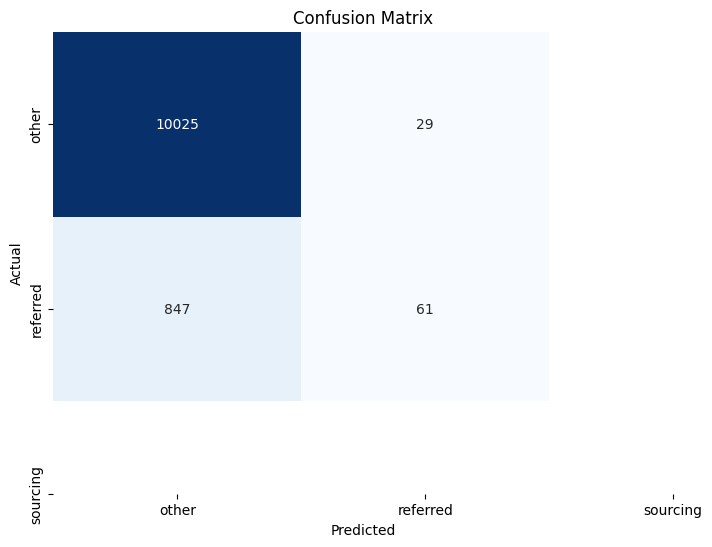

In [93]:
#Confusion matrix plotting
import matplotlib.pyplot as plt
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##kNN : k-Nearest Neighbour Classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier #Class import
knn = KNeighborsClassifier(n_neighbors=5) #here the 5 in (n_neighbors = 5) is the value of k
knn.fit(X_train, y_train) #Training

KNeighborsClassifier()

In [95]:
y_pred = knn.predict(X_val) #Evaluation
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
#Displaying the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

0.9282065316548075


In [97]:
#Displaying the confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[9997   57]
 [ 730  178]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10054
           1       0.76      0.20      0.31       908

    accuracy                           0.93     10962
   macro avg       0.84      0.60      0.64     10962
weighted avg       0.92      0.93      0.91     10962



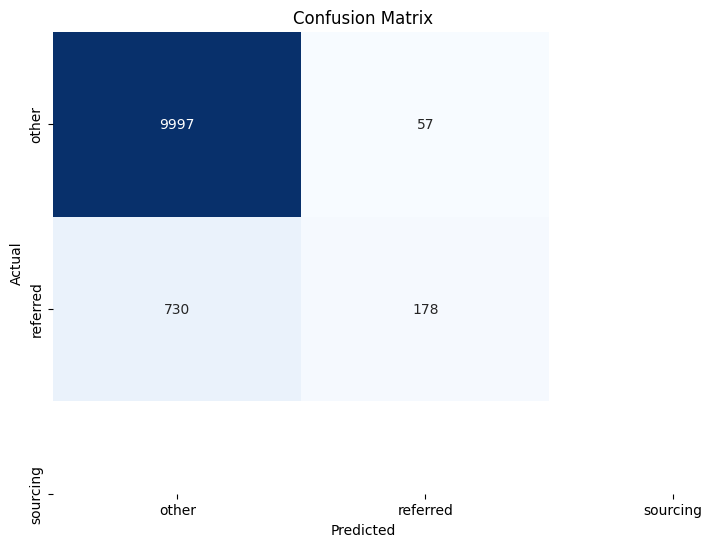

In [98]:
#Confusion matrix plotting
import matplotlib.pyplot as plt
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Decision Tree Classifiers

In [99]:
from sklearn.tree import DecisionTreeClassifier #class import
dtc = DecisionTreeClassifier() #object creation
dtc.fit(X_train, y_train) #Training

DecisionTreeClassifier()

In [100]:
y_pred = dtc.predict(X_val) #Evaluation
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
#Displaying the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

0.898284984491881


In [102]:
#Displaying the confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[9434  620]
 [ 495  413]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10054
           1       0.40      0.45      0.43       908

    accuracy                           0.90     10962
   macro avg       0.67      0.70      0.68     10962
weighted avg       0.90      0.90      0.90     10962



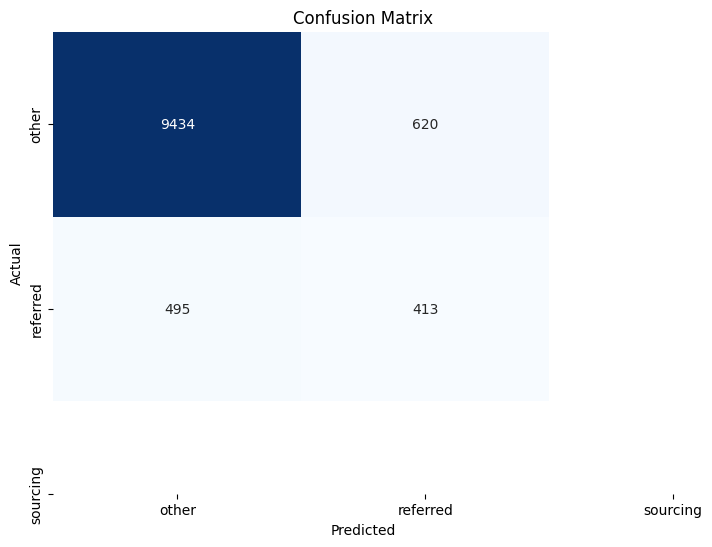

In [103]:
#Confusion matrix plotting
import matplotlib.pyplot as plt
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##SVM - Support Vector Machine

In [104]:
from sklearn.svm import SVC # class import
svc = SVC(kernel='linear') #object import
svc.fit(X_train, y_train) #finding fit line

SVC(kernel='linear')

In [105]:
y_pred = svc.predict(X_val) #Evaluation
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
#Displaying the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

0.9171683999270206


In [107]:
#Displaying the confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[10054     0]
 [  908     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.00      0.00      0.00       908

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


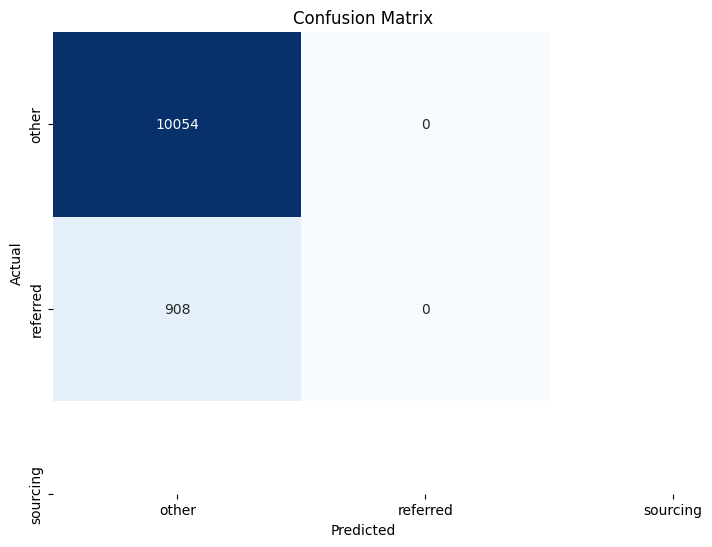

In [108]:
#Confusion matrix plotting
import matplotlib.pyplot as plt
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Naive Bayes Classifier

In [109]:
from sklearn.naive_bayes import GaussianNB #Class import
nb = GaussianNB() #Object creation
nb.fit(X_train, y_train) #Training

GaussianNB()

In [110]:
y_pred = nb.predict(X_val) #Evaluation
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
#Displaying the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

0.9151614668856048


In [112]:
#Displaying the confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[9915  139]
 [ 791  117]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10054
           1       0.46      0.13      0.20       908

    accuracy                           0.92     10962
   macro avg       0.69      0.56      0.58     10962
weighted avg       0.89      0.92      0.89     10962



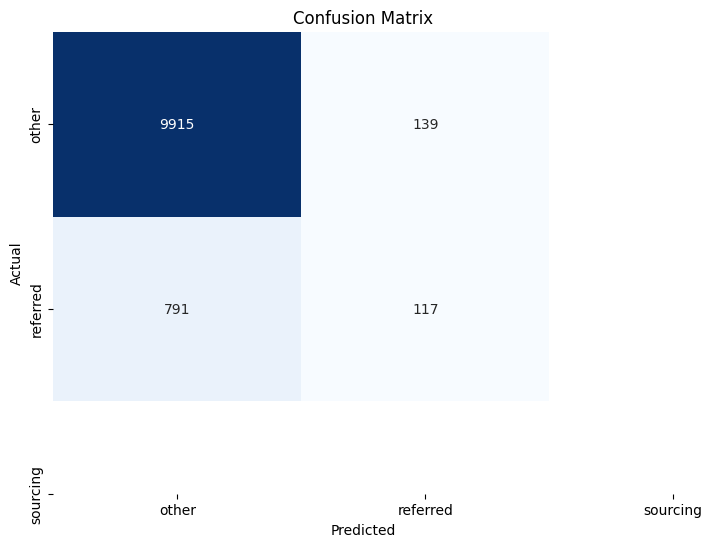

In [113]:
#Confusion matrix plotting
import matplotlib.pyplot as plt
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Random Tree Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier #class import
rf = RandomForestClassifier(n_estimators=200) #object creation
rf.fit(X_train, y_train) #Training

RandomForestClassifier(n_estimators=200)

In [115]:
y_pred = rf.predict(X_val) #Evaluation
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [116]:
#Displaying the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

0.9359605911330049


In [117]:
#Displaying the confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[10002    52]
 [  650   258]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.83      0.28      0.42       908

    accuracy                           0.94     10962
   macro avg       0.89      0.64      0.69     10962
weighted avg       0.93      0.94      0.92     10962



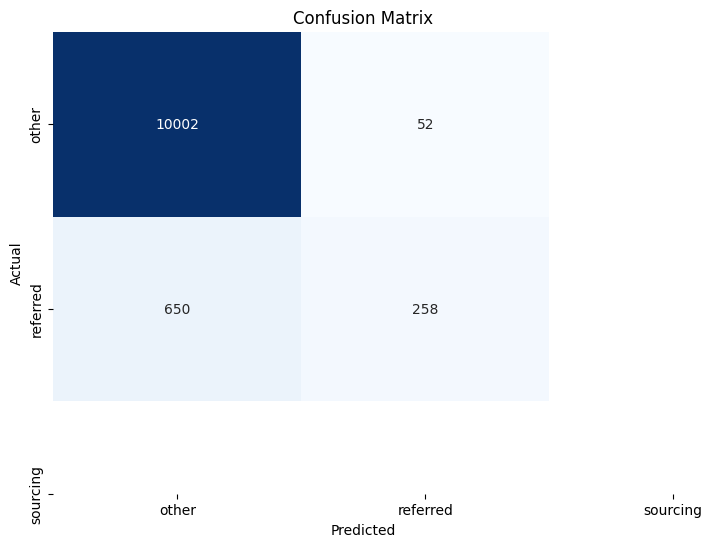

In [118]:
#Confusion matrix plotting
import matplotlib.pyplot as plt
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##MLP Classifier

In [119]:
from sklearn.neural_network import MLPClassifier
#Create an MLP classifier
#Multi layer prescription
mlp = MLPClassifier(hidden_layer_sizes=(10,10,5), max_iter=1000, random_state=42) #Assigning Object. Only the hidden layer parameter is given. Input and output neuurons are not necessarily specified.
                                                                                  #max_iter is how may time iteration is to be done
# Train the MLP model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 5), max_iter=1000, random_state=42)

In [120]:
y_pred = mlp.predict(X_val) #Evaluation
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [121]:
#Displaying the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

0.9343185550082101


In [122]:
#Displaying the confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[10030    24]
 [  696   212]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.90      0.23      0.37       908

    accuracy                           0.93     10962
   macro avg       0.92      0.62      0.67     10962
weighted avg       0.93      0.93      0.92     10962



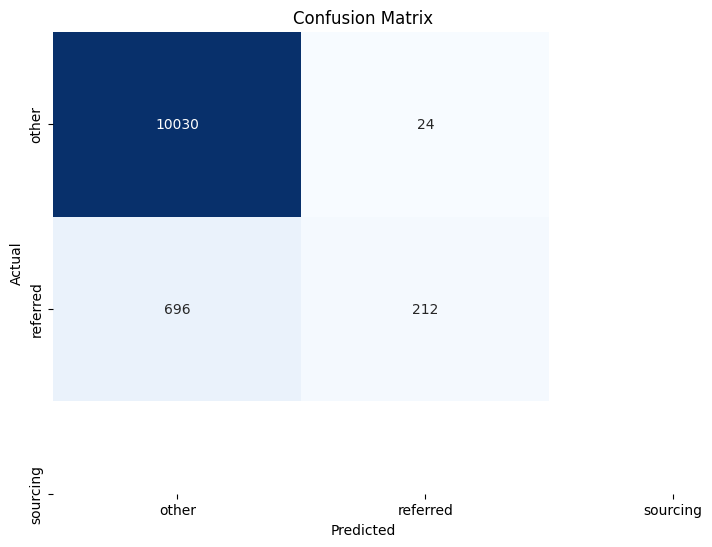

In [123]:
#Confusion matrix plotting
import matplotlib.pyplot as plt
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##GradientBoostingClassifier

In [124]:
from sklearn.ensemble import GradientBoostingClassifier #Class import
gbc = GradientBoostingClassifier(random_state=42) #object creation
gbc.fit(X_train, y_train) #Training

GradientBoostingClassifier(random_state=42)

In [125]:
y_pred = gbc.predict(X_val) #Evaluation
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [126]:
#Displaying the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

0.939792008757526


In [127]:
#Displaying the confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[10042    12]
 [  648   260]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.96      0.29      0.44       908

    accuracy                           0.94     10962
   macro avg       0.95      0.64      0.70     10962
weighted avg       0.94      0.94      0.92     10962



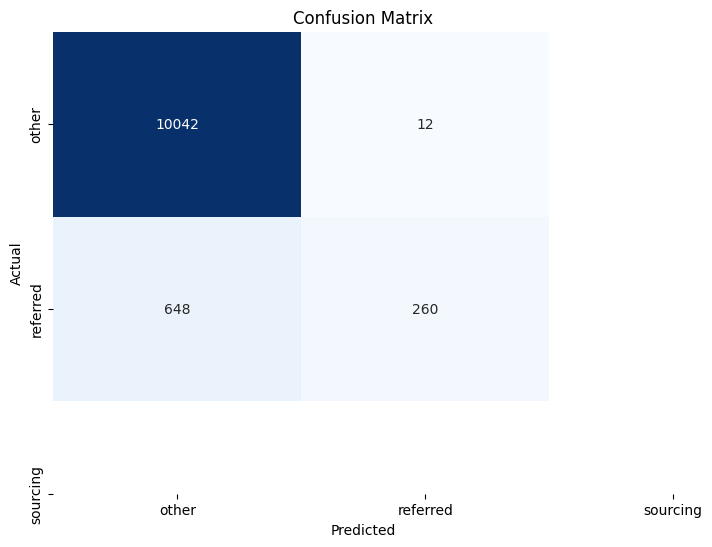

In [128]:
#Confusion matrix plotting
import matplotlib.pyplot as plt
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##XGBClassifier

In [129]:
from xgboost import XGBClassifier #Class import
xgb = XGBClassifier(colsample_bytree= 0.6, eval_metric= 'logloss', learning_rate= 0.1, max_depth= 7, n_estimators= 300, objective= 'binary:logistic', subsample= 1.0,random_state=42) #object creation
xgb.fit(X_train, y_train) #Training

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [130]:
y_pred = xgb.predict(X_val) #Evaluation
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [131]:
#Displaying the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

0.9425287356321839


In [132]:
#Displaying the confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[10013    41]
 [  589   319]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.89      0.35      0.50       908

    accuracy                           0.94     10962
   macro avg       0.92      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962



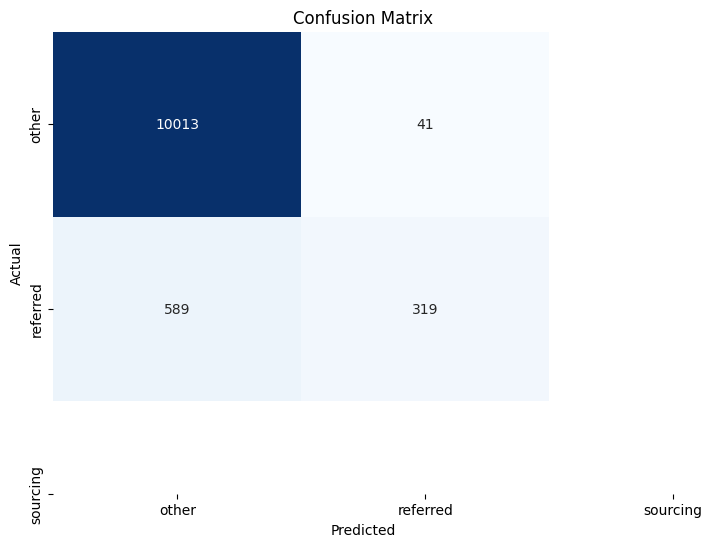

In [133]:
#Confusion matrix plotting
import matplotlib.pyplot as plt
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##LGBMClassifier

In [134]:
from lightgbm import LGBMClassifier #Class import
lgbm = LGBMClassifier(learning_rate= 0.1, max_depth= 10, metric= 'f1', n_estimators= 300, num_leaves= 31, objective= 'binary',random_state=42) #Object creation
lgbm.fit(X_train, y_train) #Training

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3760, number of negative: 40086
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 43846, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085755 -> initscore=-2.366608
[LightGBM] [Info] Start training from score -2.366608


LGBMClassifier(max_depth=10, metric='f1', n_estimators=300, objective='binary',
               random_state=42)

In [135]:
#Displaying accuracy score, confusion matrix and classifiaction report
y_pred = lgbm.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9430760810071155
[[10017    37]
 [  587   321]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.90      0.35      0.51       908

    accuracy                           0.94     10962
   macro avg       0.92      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962



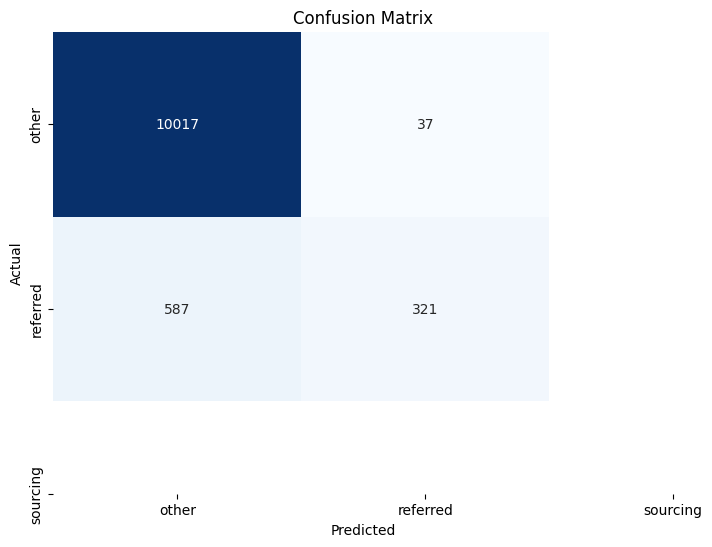

In [136]:
#Confusion matrix plotting
import matplotlib.pyplot as plt
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Model Tuning

##KNN

In [137]:
from sklearn.neighbors import KNeighborsClassifier #class import
knn = KNeighborsClassifier(n_neighbors=3) #here the 3 in (n_neighbors = 3) is the value of k
knn.fit(X_train, y_train) #Training

KNeighborsClassifier(n_neighbors=3)

In [138]:
#Displaying accuracy score, confusion matrix and classification report
y_pred = knn.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.922824302134647
[[9901  153]
 [ 693  215]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     10054
           1       0.58      0.24      0.34       908

    accuracy                           0.92     10962
   macro avg       0.76      0.61      0.65     10962
weighted avg       0.91      0.92      0.91     10962



In [139]:
from sklearn.neighbors import KNeighborsClassifier #Class import
knn = KNeighborsClassifier(n_neighbors=7) #here the 7 in (n_neighbors = 7) is the value of k
knn.fit(X_train, y_train) #Training

KNeighborsClassifier(n_neighbors=7)

In [140]:
#Displaying accuracy score, confusion matrix and classification report
y_pred = knn.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9290275497172049
[[10023    31]
 [  747   161]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10054
           1       0.84      0.18      0.29       908

    accuracy                           0.93     10962
   macro avg       0.88      0.59      0.63     10962
weighted avg       0.92      0.93      0.91     10962



In [141]:
from sklearn.neighbors import KNeighborsClassifier #Class import
knn = KNeighborsClassifier(n_neighbors=9) #here the 9 in (n_neighbors = 9) is the value of k
knn.fit(X_train, y_train) #Training

KNeighborsClassifier(n_neighbors=9)

In [142]:
#Displaying accuracy score, confusion matrix and classification report
y_pred = knn.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9295748950921364
[[10038    16]
 [  756   152]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10054
           1       0.90      0.17      0.28       908

    accuracy                           0.93     10962
   macro avg       0.92      0.58      0.62     10962
weighted avg       0.93      0.93      0.91     10962



##SVM

In [143]:
from sklearn.svm import SVC # class import
svc = SVC(kernel='rbf') #object import
svc.fit(X_train, y_train) #finding fit line

SVC()

In [144]:
#Displaying accuracy score, confusion matrix and classification report
y_pred = svc.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9171683999270206
[[10054     0]
 [  908     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.00      0.00      0.00       908

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [145]:
from sklearn.svm import SVC # class import
svc = SVC(kernel='poly') #object import
svc.fit(X_train, y_train) #finding fit line

SVC(kernel='poly')

In [146]:
#Displaying accuracy score, confusion matrix and classification report
y_pred = svc.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9171683999270206
[[10054     0]
 [  908     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.00      0.00      0.00       908

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Random Forest Classifier

In [147]:
from sklearn.ensemble import RandomForestClassifier #Class import
rf = RandomForestClassifier(n_estimators=50) #Object import
rf.fit(X_train, y_train) #Training

RandomForestClassifier(n_estimators=50)

In [148]:
#Displaying accuracy score, confusion matrix and classifiaction report
y_pred = rf.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9345010034665208
[[9998   56]
 [ 662  246]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.81      0.27      0.41       908

    accuracy                           0.93     10962
   macro avg       0.88      0.63      0.69     10962
weighted avg       0.93      0.93      0.92     10962



In [149]:
from sklearn.ensemble import RandomForestClassifier #Class import
rf = RandomForestClassifier(n_estimators=100) #Object creation
rf.fit(X_train, y_train) #Training

RandomForestClassifier()

In [150]:
#Displaying accuracy score, confusion matrix and classifiaction report
y_pred = rf.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9361430395913155
[[10004    50]
 [  650   258]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.84      0.28      0.42       908

    accuracy                           0.94     10962
   macro avg       0.89      0.64      0.70     10962
weighted avg       0.93      0.94      0.92     10962



In [151]:
from sklearn.ensemble import RandomForestClassifier #Class import
rf = RandomForestClassifier(n_estimators=150) #Object creation
rf.fit(X_train, y_train) #Training

RandomForestClassifier(n_estimators=150)

In [152]:
#Displaying accuracy score, confusion matrix and classifiaction report
y_pred = rf.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9361430395913155
[[9999   55]
 [ 645  263]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.83      0.29      0.43       908

    accuracy                           0.94     10962
   macro avg       0.88      0.64      0.70     10962
weighted avg       0.93      0.94      0.92     10962



##XGB

In [153]:
from xgboost import XGBClassifier #Class import
xgb = XGBClassifier(colsample_bytree= 0.6, eval_metric= 'logloss', learning_rate= 0.1, max_depth= 7, n_estimators= 300, objective= 'binary:logistic', subsample= 1.0) #object creation
xgb.fit(X_train, y_train) #Training

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [154]:
#Displaying accuracy score, confusion matrix and classification report
y_pred = xgb.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9430760810071155
[[10016    38]
 [  586   322]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.89      0.35      0.51       908

    accuracy                           0.94     10962
   macro avg       0.92      0.68      0.74     10962
weighted avg       0.94      0.94      0.93     10962



In [155]:
from xgboost import XGBClassifier #Class import
xgb = XGBClassifier(eval_metric='logloss',
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    colsample_bytree=0.6,
    subsample=1.0,
    random_state=42) #object creation
xgb.fit(X_train, y_train) #Training

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [156]:
#Displaying accuracy score, confusion matrix and classification report
y_pred = xgb.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9425287356321839
[[10013    41]
 [  589   319]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.89      0.35      0.50       908

    accuracy                           0.94     10962
   macro avg       0.92      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962



##LightGBM

In [157]:
from lightgbm import LGBMClassifier #Class import
lgbm = LGBMClassifier(learning_rate= 0.1, max_depth= 10, metric= 'f1', n_estimators= 300, num_leaves= 31, objective= 'binary') #Object creation
lgbm.fit(X_train, y_train) #Training

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3760, number of negative: 40086
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 43846, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085755 -> initscore=-2.366608
[LightGBM] [Info] Start training from score -2.366608


LGBMClassifier(max_depth=10, metric='f1', n_estimators=300, objective='binary')

In [158]:
#Displaying accuracy score, confusion matrix and classifiaction report
y_pred = lgbm.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9430760810071155
[[10017    37]
 [  587   321]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.90      0.35      0.51       908

    accuracy                           0.94     10962
   macro avg       0.92      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962



In [159]:
from lightgbm import LGBMClassifier #Class import
lgbm = LGBMClassifier(num_leave= np.int64(35), n_estimators= 300, min_child_samples= 20, max_depth= np.int64(9), learning_rate= 0.1, lambda_l2= 0, lambda_l1= 1, feature_fraction= 0.6, bagging_freq= 10, bagging_fraction= 1.0) #Object creation
lgbm.fit(X_train, y_train) #Training

[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1, reg_a

LGBMClassifier(bagging_fraction=1.0, bagging_freq=10, feature_fraction=0.6,
               lambda_l1=1, lambda_l2=0, max_depth=np.int64(9),
               n_estimators=300, num_leave=np.int64(35))

In [160]:
#Displaying accuracy score, confusion matrix and classifiaction report
y_pred = lgbm.predict(X_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
0.9428024083196497
[[10018    36]
 [  591   317]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.90      0.35      0.50       908

    accuracy                           0.94     10962
   macro avg       0.92      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962



#Model Evaluation

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models = [
    ('Logistic Regression',lr, "max_iter=1000"),
    ('knn',knn, "n_neighbors=3"),
    ('knn',knn, "n_neighbors=5"),
    ('knn',knn, "n_neighbors=7"),
    ('knn',knn, "n_neighbors=9"),
    ('Decision Tree',dtc,""),
    ('SVM',svc, "kernel='linear'"),
    ('SVM',svc, "kernel='rbf'"),
    ('SVM',svc, "kernel='poly'"),
    ('Naive Bayes',nb,""),
    ('Random Forest',rf, "n_estimators=50"),
    ('Random Forest',rf, "n_estimators=100"),
    ('Random Forest',rf, "n_estimators=150"),
    ('Random Forest',rf, "n_estimators=200"),
    ('MLP',mlp,"hidden_layer_sizes=(10,10,5), max_iter=1000, random_state=42"),
    ('Gradient Boosting',gbc, "random_state=42"),
    ('XGB',xgb,"colsample_bytree= 0.6, eval_metric= 'logloss', learning_rate= 0.1, max_depth= 7, n_estimators= 300, objective= 'binary:logistic', subsample= 1.0,random_state=42"),
    ('XGB',xgb,"colsample_bytree= 0.6, eval_metric= 'logloss', learning_rate= 0.1, max_depth= 7, n_estimators= 300, objective= 'binary:logistic', subsample= 1.0"),
    ('XGB',xgb,"eval_metric='logloss',learning_rate=0.1,max_depth=7,n_estimators=300,colsample_bytree=0.6,subsample=1.0,random_state=42"),
    ('LGBM',lgbm,"learning_rate= 0.1, max_depth= 10, metric= 'f1', n_estimators= 300, num_leaves= 31, objective= 'binary',random_state=42"),
    ('LGBM',lgbm,"learning_rate= 0.1, max_depth= 10, metric= 'f1', n_estimators= 300, num_leaves= 31, objective= 'binary'"),
    ('LGBM',lgbm,"num_leave= np.int64(35), n_estimators= 300, min_child_samples= 20, max_depth= np.int64(9), learning_rate= 0.1, lambda_l2= 0, lambda_l1= 1, feature_fraction= 0.6, bagging_freq= 10, bagging_fraction= 1.0")
]
performance = []

for name, model, params in models:
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    performance.append([name, params, accuracy, precision, recall, f1])




# Create DataFrame
df = pd.DataFrame(performance,columns=['Model', 'Hyperparameters', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
df

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] baggin

,Model,Hyperparameters,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,max_iter=1000,0.920088,0.677778,0.067181,0.122244
1,knn,n_neighbors=3,0.929575,0.904762,0.167401,0.282528
2,knn,n_neighbors=5,0.929575,0.904762,0.167401,0.282528
3,knn,n_neighbors=7,0.929575,0.904762,0.167401,0.282528
4,knn,n_neighbors=9,0.929575,0.904762,0.167401,0.282528
5,Decision Tree,,0.898285,0.399806,0.454846,0.425554
6,SVM,kernel='linear',0.917168,0.000000,0.000000,0.000000
7,SVM,kernel='rbf',0.917168,0.000000,0.000000,0.000000
8,SVM,kernel='poly',0.917168,0.000000,0.000000,0.000000
9,Naive Bayes,,0.915161,0.457031,0.128855,0.201031


In [162]:
# Find the row with the highest accuracy
best_model_row = df.loc[df['Accuracy'].idxmax()]

# Print the row containing the best model's information
print(f"The best model is: {best_model_row['Model']}")
print(best_model_row.drop('Model'))

The best model is: LGBM
Hyperparameters    learning_rate= 0.1, max_depth= 10, metric= 'f1...
Accuracy                                                    0.942802
Precision                                                   0.898017
Recall                                                      0.349119
F1 Score                                                    0.502776
Name: 19, dtype: object


In [163]:
# Drop the employee_id column from df_test before making predictions
X_test = df_test.drop('employee_id', axis=1)
predictions = model.predict(X_test)

[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


In [164]:
submission = df_sample.copy()
submission['is_promoted'] = predictions
submission.to_csv('my_submission.csv', index=False)

In [165]:
from google.colab import files
files.download('my_submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Conclusion

From the above performance matrix, it is clear that LightGBM  Classifier outperformed all other models with an accuracy of 94% and the highest F1 score, indicating it balances precision and recall well. LightGBM is an efficient and powerful gradient boosting framework that uses leaf-wise tree growth and histogram-based splitting to deliver fast training and high accuracy. This model has the  ability to handle large datasets, support categorical features natively, and effectively manage missing values makes it a strong choice for classification and regression tasks.

 The given data set was a medium sized one with one target ,'is_promoted', and 14 features , 'employee_id', 'department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score'. The training and testing datasets were kept separate, with the testing dataset excluding the target variable.

The XGB model, along with related algorithms, achieved similar accuracy and F1 scores, indicating that they were also able to handle the dataset effectively.